# Predictive Analysis of Employee Attrition and Performance
### Phase 1: Data Preparation & Visualisation
#### By -  Rakshit Chandna


# Table of Contents

- [Introduction](#one)
- [Dataset Source](#two)
- [Dataset Details](#three)
- [Dataset Features](#four)
- [Target Feature](#five)
- [Goals and Objectives](#six)
- [Data Cleaning and Preprocessing](#seven)
- [Data Exploration and Visualisation](#eight)
- [Summary and Conclusion](#nine)
- [References](#ten)

# Introduction <a id="one"></a>

Employees are said to be the most valueable resource in any organisation. An employee leaving the organization can have a very negative impactive impact in the day to day functioning of it. With the use of analytics and machine learning we will try to unliean patterns that cause employees to leave an organisation. 


# Data Source<a id="two"></a>

The IBM HR Analytics Attrition Dataset used in this study was obtained from Kaggle (Pavan_Subhash, 2021) https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data. This dataset comprises employee information from a fictional company, including demographic attributes, job roles, performance ratings, and indicators of attrition.

# Dataset Details<a id="three"></a>

The IBM HR Analytics Attrition Dataset provides comprehensive information about employee demographicsjob roles, and satisfaction levels, as well as indicators of attrition. The dataset comprises information such as employees' age, gender, education level, job role, monthly income, work-life balance, and years of experience with the company, among others.


The dataset's primary objective is to understand the factors contributing to employee attrition and develop predictive models to anticipate and mitigate attrition risks. By analyzing this dataset, HR professionals and business leaders can gain valuable insights into employee retention strategies and improve overall workforce management practices.It comprises 1470 observations and 35 features.

##### Importing  Libraries

In [381]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

##### Importing Data

In [382]:
data=pd.read_csv("Phase1_Group51.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##### Shape of Data

In [383]:
data.shape

(1470, 35)

The Dataset consist of 35 features and 1470 observations.

#### 10 Random Observations

In [384]:
data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1023,56,No,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,Y,No,22,4,4,80,1,5,3,4,3,2,1,0
835,35,No,Travel_Rarely,528,Human Resources,8,4,Technical Degree,1,1164,3,Male,100,3,1,Human Resources,3,Single,4323,7108,1,Y,No,17,3,2,80,0,6,2,1,5,4,1,4
1232,35,No,Travel_Rarely,1370,Research & Development,27,4,Life Sciences,1,1728,4,Male,49,3,2,Manufacturing Director,3,Married,6883,5151,2,Y,No,16,3,2,80,1,17,3,3,7,7,0,7
1378,42,No,Travel_Rarely,419,Sales,12,4,Marketing,1,1943,2,Male,77,3,2,Sales Executive,4,Divorced,5087,2900,3,Y,Yes,12,3,3,80,2,14,4,3,0,0,0,0
1364,28,No,Travel_Frequently,783,Sales,1,2,Life Sciences,1,1927,3,Male,42,2,2,Sales Executive,4,Married,6834,19255,1,Y,Yes,12,3,3,80,1,7,2,3,7,7,0,7
462,34,No,Travel_Rarely,258,Sales,21,4,Life Sciences,1,621,4,Male,74,4,2,Sales Executive,4,Single,5337,19921,1,Y,No,12,3,4,80,0,10,3,3,10,7,5,7
1230,24,No,Travel_Rarely,506,Research & Development,29,1,Medical,1,1725,2,Male,91,3,1,Laboratory Technician,1,Divorced,3907,3622,1,Y,No,13,3,2,80,3,6,2,4,6,2,1,2
1264,55,No,Travel_Rarely,478,Research & Development,2,3,Medical,1,1770,3,Male,60,2,5,Research Director,1,Married,19038,19805,8,Y,No,12,3,2,80,3,34,2,3,1,0,0,0
273,37,No,Travel_Rarely,228,Sales,6,4,Medical,1,378,3,Male,98,3,2,Sales Executive,4,Married,6502,22825,4,Y,No,14,3,2,80,1,7,5,4,5,4,0,1
618,25,No,Travel_Rarely,180,Research & Development,2,1,Medical,1,854,1,Male,65,4,1,Research Scientist,1,Single,3424,21632,7,Y,No,13,3,3,80,0,6,3,2,4,3,0,1


# Dataset Features <a id="four"></a>

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [385]:
from tabulate import tabulate

table = [
    ['Age', 'Numeric', 'N/A', 'Age of the employee'],
    ['Attrition', 'Nominal Categorical', 'N/A', 'Employee attrition status (No,Yes)'],
    ['BusinessTravel', 'Nominal Categorical', 'N/A', 'Frequency of business travel (Travel_Rarely, Travel_Frequently, Non-Travel)'],
    ['DailyRate', 'Numeric', 'N/A', 'Daily rate of pay'],
    ['Department', 'Nominal Categorical', 'N/A', 'Department of the employee (Research & Development, Sales, Human Resources)'],
    ['DistanceFromHome', 'Numeric', 'N/A', 'Distance from home to workplace'],
    ['Education', 'Numeric', 'N/A', 'Level of education'],
    ['EducationField', 'Nominal Categorical', 'N/A', 'Field of education (Life Sciences, Medical, Marketing, Technical Degree, Other, Human Resources)'],
    ['EmployeeCount', 'Numeric', 'N/A', 'Count of employees'],
    ['EmployeeNumber', 'Numeric', 'N/A', 'Employee number'],
    ['EnvironmentSatisfaction', 'Numeric', 'N/A', 'Level of environmental satisfaction'],
    ['Gender', 'Nominal Categorical', 'N/A', 'Gender of the employee (Male, Female)'],
    ['HourlyRate', 'Numeric', 'N/A', 'Hourly rate of pay'],
    ['JobInvolvement', 'Numeric', 'N/A', 'Level of job involvement'],
    ['JobLevel', 'Numeric', 'N/A', 'Level of job position'],
    ['JobRole', 'Nominal Categorical', 'N/A', 'Role of the employee (Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources)'],
    ['JobSatisfaction', 'Numeric', 'N/A', 'Level of job satisfaction'],
    ['MaritalStatus', 'Nominal Categorical', 'N/A', 'Marital status of the employee (Married: 673, Single: 470, Divorced: 327)'],
    ['MonthlyIncome', 'Numeric', 'N/A', 'Monthly income of the employee'],
    ['MonthlyRate', 'Numeric', 'N/A', 'Monthly rate of pay'],
    ['NumCompaniesWorked', 'Numeric', 'N/A', 'Number of companies worked for'],
    ['Over18', 'Nominal Categorical', 'N/A', 'Employee age over 18 (Yes)'],
    ['OverTime', 'Nominal Categorical', 'N/A', 'Overtime status (No, Yes)'],
    ['PercentSalaryHike', 'Numeric', 'N/A', 'Percentage increase in salary'],
    ['PerformanceRating', 'Numeric', 'N/A', 'Performance rating of the employee'],
    ['RelationshipSatisfaction', 'Numeric', 'N/A', 'Level of relationship satisfaction'],
    ['StandardHours', 'Numeric', 'N/A', 'Standard hours of work'],
    ['StockOptionLevel', 'Numeric', 'N/A', 'Level of stock options'],
    ['TotalWorkingYears', 'Numeric', 'N/A', 'Total years of working'],
    ['TrainingTimesLastYear', 'Numeric', 'N/A', 'Number of training times last year'],
    ['WorkLifeBalance', 'Numeric', 'N/A', 'Level of work-life balance'],
    ['YearsAtCompany', 'Numeric', 'N/A', 'Years at the company'],
    ['YearsInCurrentRole', 'Numeric', 'N/A', 'Years in current role'],
    ['YearsSinceLastPromotion', 'Numeric', 'N/A', 'Years since last promotion'],
    ['YearsWithCurrManager', 'Numeric', 'N/A', 'Years with current manager']
]

print(tabulate(table, headers=['Column', 'Data Type', 'Units', 'Description'], tablefmt='fancy_grid'))


╒══════════════════════════╤═════════════════════╤═════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Column                   │ Data Type           │ Units   │ Description                                                                                                                                                                                             │
╞══════════════════════════╪═════════════════════╪═════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Age                      │ Numeric             │ N/A     │ Age of the employee                                                                                                                                   

#### Mapping all necessary Categorical features for Exploratory Data Analysis and Visualisation

In [386]:
# Education
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
data['Education'] = data['Education'].map(education_map)
data['Education'] = pd.Categorical(data['Education'], categories=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], ordered=True)

# EnvironmentSatisfaction
env_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].map(env_satisfaction_map)
data['EnvironmentSatisfaction'] = pd.Categorical(data['EnvironmentSatisfaction'], categories=['Low', 'Medium', 'High', 'Very High'], ordered=True)

# JobInvolvement
job_involve_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

data['JobInvolvement'] = data['JobInvolvement'].map(job_involve_map)
data['JobInvolvement'] = pd.Categorical(data['JobInvolvement'], categories=['Low', 'Medium', 'High', 'Very High'], ordered=True)

# JobSatisfaction
job_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
data['JobSatisfaction'] = data['JobSatisfaction'].map(job_satisfaction_map)
data['JobSatisfaction'] = pd.Categorical(data['JobSatisfaction'], categories=['Low', 'Medium', 'High', 'Very High'], ordered=True)

# PerformanceRating
perf_rating_map = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}
data['PerformanceRating'] = data['PerformanceRating'].map(perf_rating_map)
data['PerformanceRating'] = pd.Categorical(data['PerformanceRating'], categories=['Low', 'Good', 'Excellent', 'Outstanding'], ordered=True)

# RelationshipSatisfaction
relation_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].map(relation_satisfaction_map)
data['RelationshipSatisfaction'] = pd.Categorical(data['RelationshipSatisfaction'], categories=['Low', 'Medium', 'High', 'Very High'], ordered=True)

# WorkLifeBalance
work_life_balance_map = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}
data['WorkLifeBalance'] = data['WorkLifeBalance'].map(work_life_balance_map)
data['WorkLifeBalance'] = pd.Categorical(data['WorkLifeBalance'], categories=['Bad', 'Good', 'Better', 'Best'], ordered=True)


#### Reviewing the Dataset Again

In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   category
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   catego

As we can clearly observe above that all the categorical variables have been changed from numerics to actual values/meaning they represent.

#### Summary Statistics of Data

In [388]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0


The above summary statistics provides key statistics about various attributes of employees in the dataset:

- **Age** : Most employees are in their late thirties, with a range from 18 to 60.
- **DailyRate**: Average daily rate is around 802 dollars, with considerable variation.
- **DistanceFromHome**: On average, employees live about 9 miles from work, with some variation.
- **EmployeeCount and StandardHours**: These attributes have a constant value for all employees.
- **EmployeeNumber**: Employees are numbered from 1 to 2068.
- **HourlyRate**: Average hourly rate is around 66 dollars, with variation.
- **MonthlyIncome**: Average monthly income is around 6503 dollars, with significant variation.
- **MonthlyRate**: Average monthly rate is around 14313 dollars, with variability.
- **NumCompaniesWorked**: On average, employees have worked for about 3 companies.
- **PercentSalaryHike**: Average salary hike percentage is around 15%, with some variation.
- **TotalWorkingYears**: Employees typically have around 11 years of total work experience.
- **TrainingTimesLastYear**: Employees receive about 3 training sessions per year, on average.
- **YearsAtCompany**: On average, employees have worked at their current company for about 7 years.
- **YearsInCurrentRole**: Employees have been in their current role for around 4 years, on average.
- **YearsSinceLastPromotion**: Most recent promotion for employees occurred about 2 years ago, on average.
- **YearsWithCurrManager**: Employees have been with their current manager for around 4 years, on average.

### Target Feature <a id="five"></a>

The target variable for this project is **Attrition**, a categorical feature indicating whether an employee has left the organization or not. Predicting attrition is important for companies to identify the reasons why employees leave, create plans to keep valuable employees, and reduce the negative effects of attrition on the business and expenses.

## Goals and Objectives <a id="six"></a>

Employee attrition is a critical concern for organizations as it can impact financial performance, productivity, and overall organizational effectiveness. By understanding the factors that contribute to employee attrition, HR professionals and business leaders can implement strategies to mitigate turnover and retain valuable talent.

In this analysis, we aim to predict employee attrition using supervised machine learning algorithms, including logistic regression, random forest, and gradient boosting models. The dataset used in this analysis contains various features related to employee demographics, job characteristics, and work environment, with attrition as the outcome criterion.

Our main objectives are twofold: first, to develop predictive models that accurately forecast employee attrition based on available features, and second, to identify the key predictors of attrition among the features provided. Additionally, we will perform exploratory data analysis, including descriptive statistics and data visualization, to gain insights into the patterns and relationships within the dataset.

Ultimately, our goal is to provide actionable insights to organizations to help them better understand and address employee attrition, ultimately leading to a more engaged and productive workforce.

## Data Cleaning and Preprocessing <a id="seven"></a>

#### Value Counts for Categorical Variables

In [389]:
cat=[var for var in data.columns if data[var].dtype=='object' or data[var].dtype=='category']
for var in cat:
    print(data[var].value_counts())
    print("---------------------------------")

Attrition
No     1233
Yes     237
Name: count, dtype: int64
---------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
---------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
---------------------------------
Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: count, dtype: int64
---------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
---------------------------------
EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: count, dtype: int64
---------------------------------
Gender
Male      882
Female    588
Name: count

The code above iterates over each categorical variable, print its value counts.

In [390]:
new=data.drop(columns="Over18")

We have dropped the column name "Over18" as it has only one unique value

#### Visualizing the Distribution of Categorical Variables 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'StandardHours'}>],
       [<Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>],
       [<Axes: title={'center': 'YearsInCurrentRole'}>,
        <Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>, 

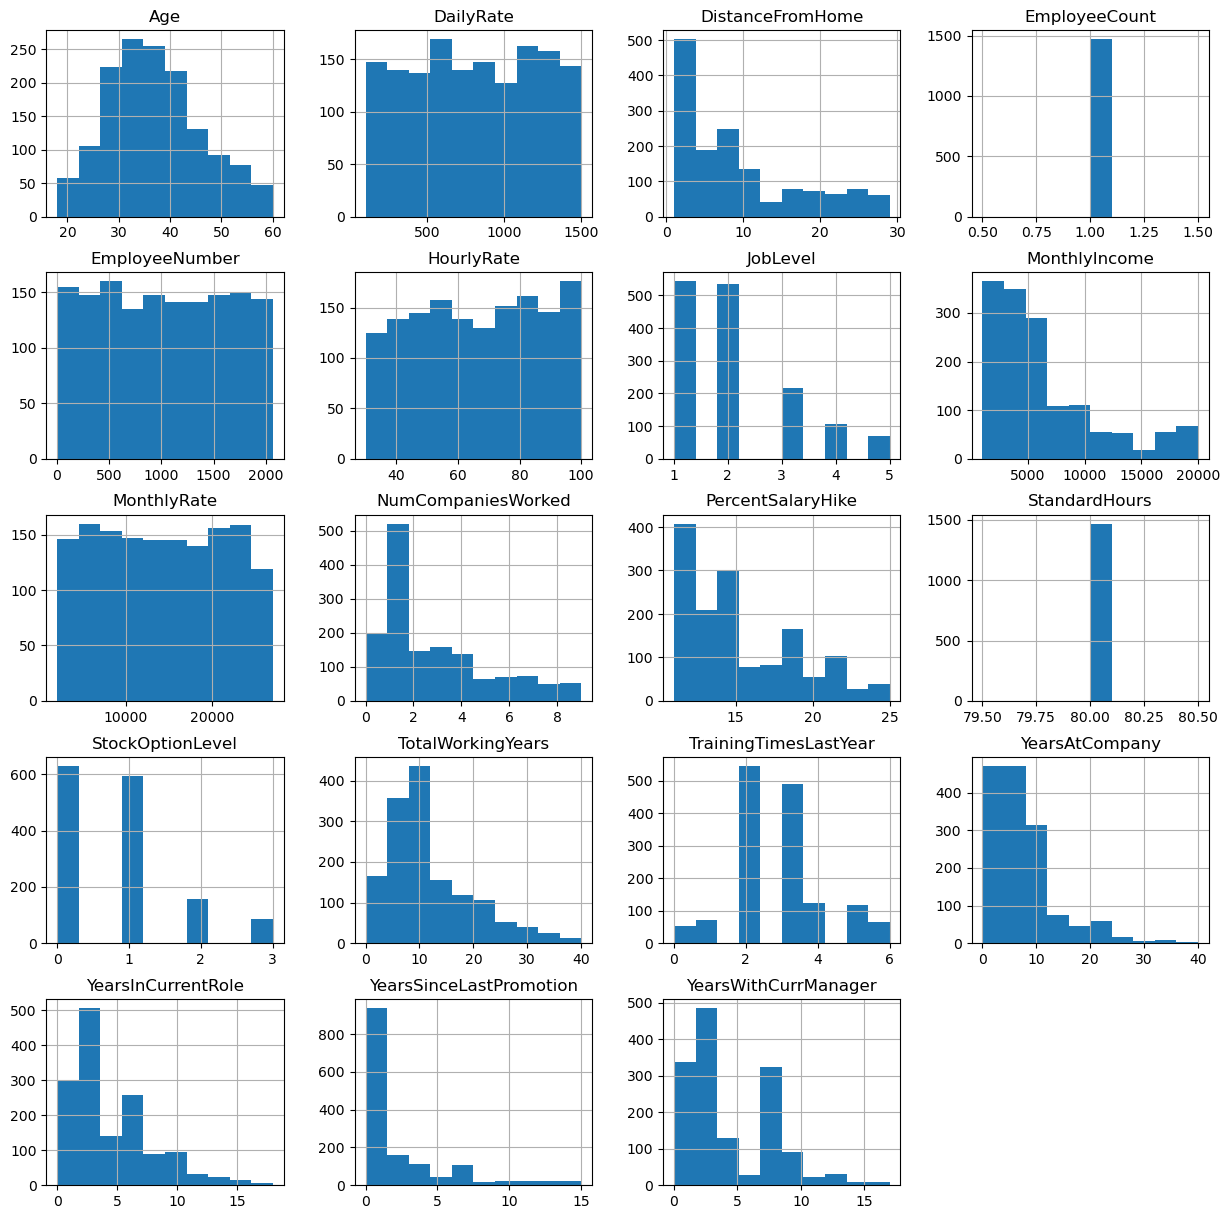

In [391]:
new.hist(figsize=(15,15))

The figures above displays multiple histograms representing the distribution of various employee attributes such as age, income level, job roles, years of experience, and other factors related to their employment. Each histogram shows the frequency or count of employees across different ranges or categories of the respective attribute, providing insights into the workforce characteristics and patterns within the employee data.

#### Summary of Missing values

In [392]:
new.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

The dataset **new** has got no missing values.

#### Duplicated Values 

In [393]:
new[new.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


The dataset **new** has got no duplicate values.

#### Dropping Columns

In [394]:
cols=["EmployeeCount","EmployeeNumber","StandardHours","MonthlyRate","DailyRate","StockOptionLevel"]
new.drop(columns=cols,inplace=True)

In [395]:
new.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,Low,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,Very High,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,Medium,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,1,Yes,11,Excellent,High,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,Very High,6,3,Better,2,2,2,2
5,32,No,Travel_Frequently,Research & Development,2,College,Life Sciences,Very High,Male,79,High,1,Laboratory Technician,Very High,Single,3068,0,No,13,Excellent,High,8,2,Good,7,7,3,6
6,59,No,Travel_Rarely,Research & Development,3,Bachelor,Medical,High,Female,81,Very High,1,Laboratory Technician,Low,Married,2670,4,Yes,20,Outstanding,Low,12,3,Good,1,0,0,0
7,30,No,Travel_Rarely,Research & Development,24,Below College,Life Sciences,Very High,Male,67,High,1,Laboratory Technician,High,Divorced,2693,1,No,22,Outstanding,Medium,1,2,Better,1,0,0,0
8,38,No,Travel_Frequently,Research & Development,23,Bachelor,Life Sciences,Very High,Male,44,Medium,3,Manufacturing Director,High,Single,9526,0,No,21,Outstanding,Medium,10,2,Better,9,7,1,8
9,36,No,Travel_Rarely,Research & Development,27,Bachelor,Medical,High,Male,94,High,2,Healthcare Representative,High,Married,5237,6,No,13,Excellent,Medium,17,3,Good,7,7,7,7


## Data Exploration and Visualisation<a id="eight"></a>

#### Fig 1: Attrition Distribution

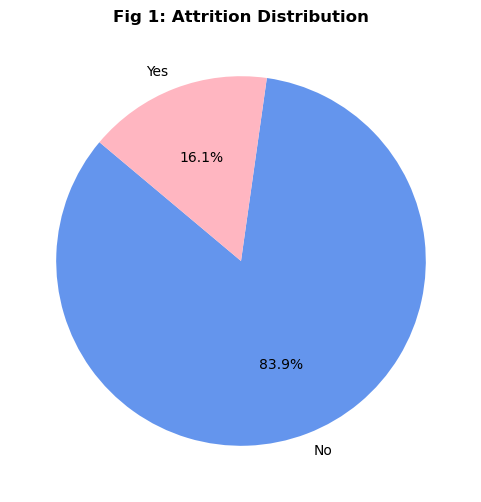

In [396]:
import matplotlib.pyplot as plt
attrition_counts = new['Attrition'].value_counts()
colors = ['#6495ED', '#FFB6C1']
plt.figure(figsize=(6, 6)) 
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Fig 1: Attrition Distribution',fontweight='bold') 
plt.show()


From the figure 1 above, we can determine that 16.1% of the employees are marked with attrition "Yes", that suggests that a small proportion of employees are likely to leave the company. Whereas, the majority, accounting for 83.9% of employees, are labeled as 'No' for attrition, indicating that they are likely to stay with the company.

#### Fig 2: Boxplot of Age by Gender and Attrition

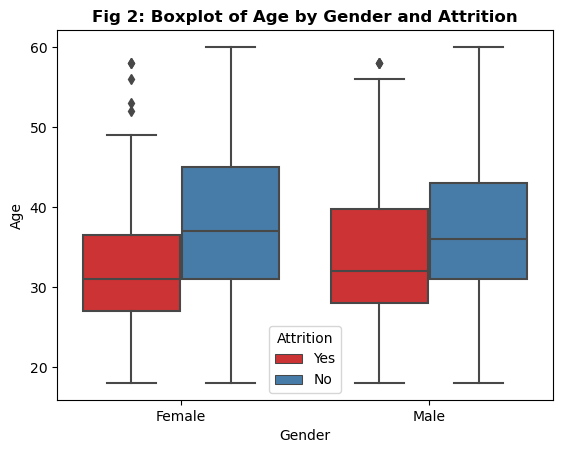

In [397]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = ["#00AFBB", "#E7B800", "#FC4E07"]
sns.boxplot(data=new, y="Age", x="Gender", hue="Attrition",palette="Set1")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Fig 2: Boxplot of Age by Gender and Attrition",fontweight='bold')
plt.show()


The boxplot in Figure 2 illustrates the distribution of ages among employees, categorized by gender and attrition status. 

Upon analysis, we observe that females aged between 26 and 36 exhibit a higher tendency to remain with the company compared to males in the same age range. Whereas, females above the age of 50 show a higher likelihood of leaving the company compared to their male counterparts.

This suggests that age may play a significant role in attrition trends within the organization, with gender also influencing these patterns.

#### Fig 3: Employee Count by Department and Attrition

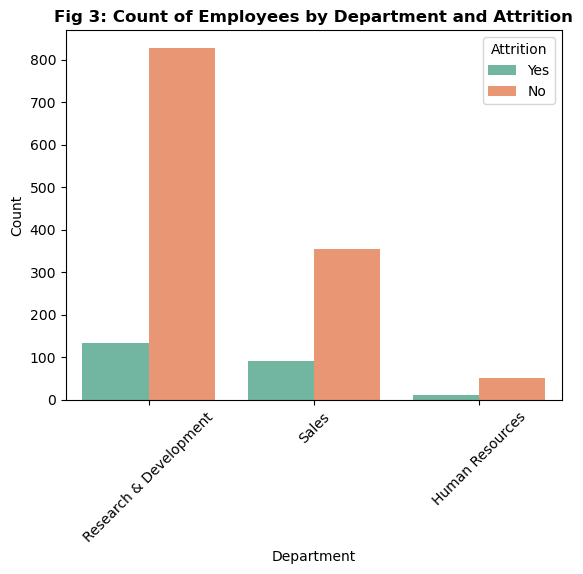

In [398]:
count=new["Department"].value_counts()
count_sorted=count.sort_values(ascending=False)
custom_colors = ["#00AFBB", "#E7B800", "#FC4E07"]
sns.countplot(data=new, x="Department",order=count_sorted.index, hue="Attrition",palette="Set2")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Fig 3: Count of Employees by Department and Attrition",fontweight='bold')
plt.xticks(rotation=45) 
plt.legend(title='Attrition')
plt.show()

The Fig 3 above, states the distribution of employees across different departments based on their attrition status. From the countplot, we can determine that the majority of employees are from the Research and Development department. Additionally, it notes that most employees with positive attrition are from this department. Whereas, there are relatively few employees from the Human Resources department who have a negative attrition status.

##### Fig 4: Age by Travel Frequency and Attrition

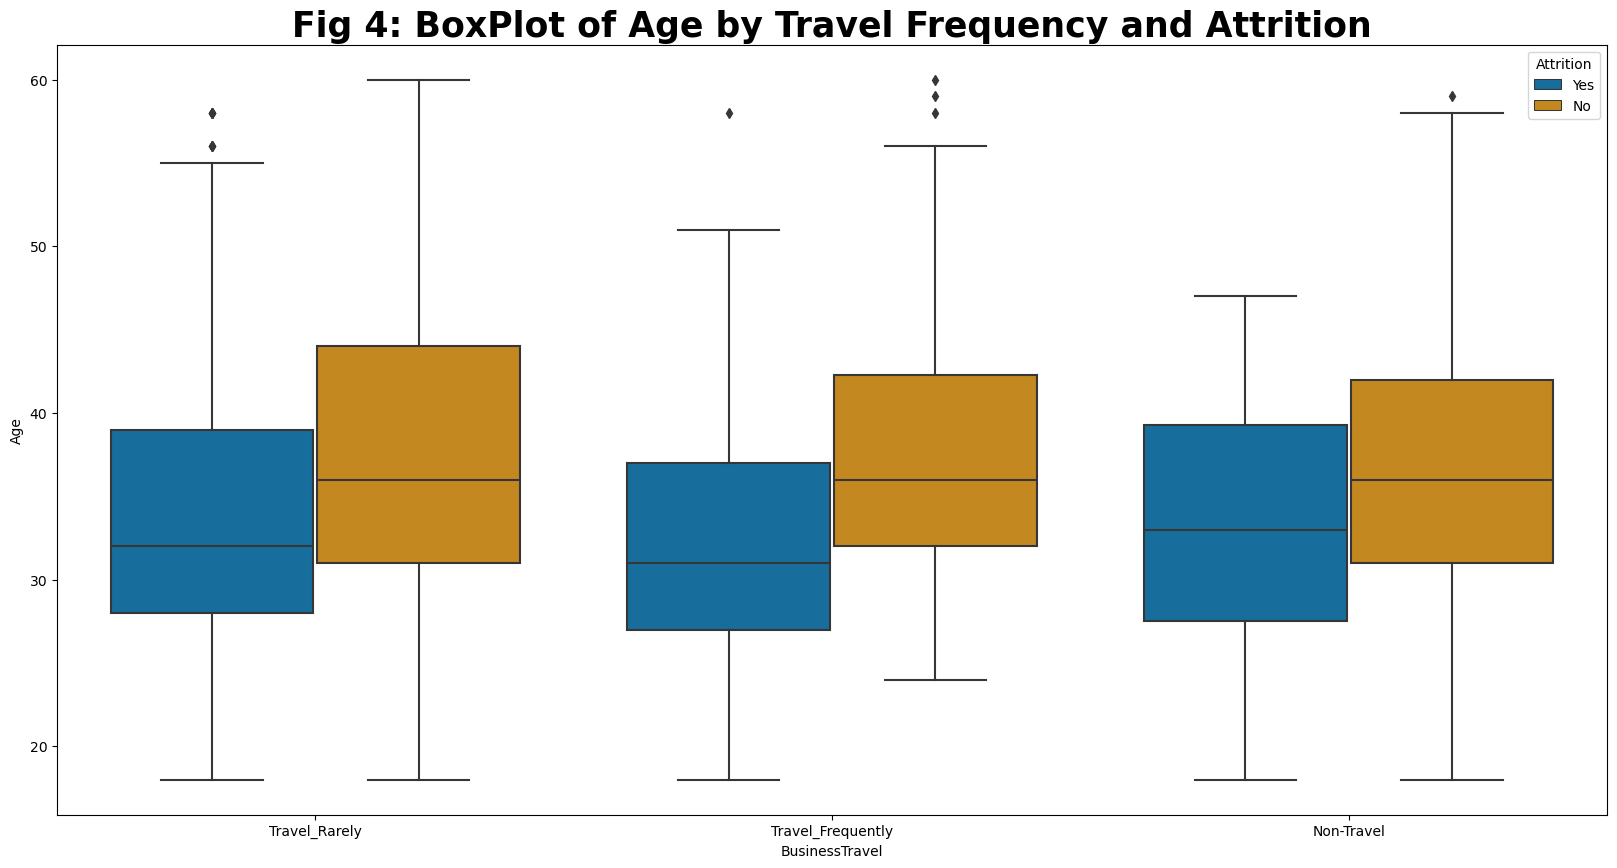

In [399]:
plt.figure(figsize=(20,10))
sns.boxplot(data=new, x="BusinessTravel",y="Age",hue="Attrition",palette="colorblind")
plt.title("Fig 4: BoxPlot of Age by Travel Frequency and Attrition",fontweight='bold', fontsize=25)
plt.show()

The Fig 4 above boxlpot provides insights into how the age distribution varies across different levels of business travel, while also considering whether employees have a positive or negative attrition status. 

#### Fig 5: Density of monthly income values for employees who either stayed or left the company

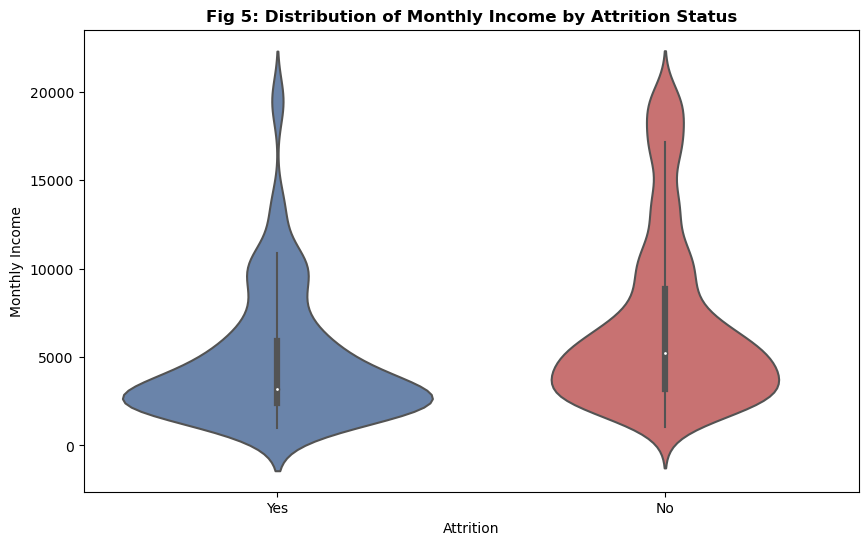

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.violinplot(data=new, x="Attrition", y="MonthlyIncome",palette=['#5f82b5', '#D76364'],)

plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.title("Fig 5: Distribution of Monthly Income by Attrition Status",fontweight='bold')

plt.show()


From the above Fig 5. the width of the plot indicates the density of data points at different income levels, We can observe that majorily people with the income between 0 and 5000 are more likely to have a positve attrition as compared to other income group.

#### Fig 6: Age Distribution Analysis

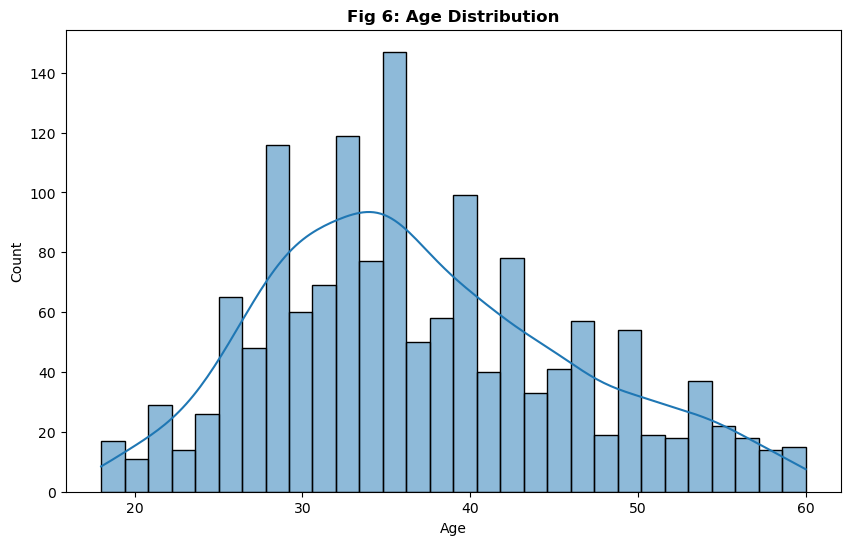

In [401]:
plt.figure(figsize=(10,6))
sns.histplot(data=new, x="Age", bins=30, kde=True)
plt.title("Fig 6: Age Distribution",fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

From the above fig. 6, the chart shows the number of employees at different ages in a company. The bars represent age groups, and the height of each bar tells you how many employees are in that age range. Most employees are between 30 and 40 years old, which means the company has a lot of younger workers. As the ages get higher, like 50s and 60s, the bars get shorter. This means there are fewer older employees compared to the younger ones. So in summary, this company seems to have more young to middle-aged workers overall, and the number of employees decreases as the age increases.

####  Defining Employee Generation, age wise

In [402]:
def determine_age_group(person_age):
    if 97 <= person_age <= 120:
        return 'The Greatest Generation (World War II)'
    elif 79 <= person_age <= 96:
        return 'The Silent Generation (Post-War Era)'
    elif 70 <= person_age <= 78:
        return 'Baby Boomers (First Wave)'
    elif 60 <= person_age <= 69:
        return 'Baby Boomers (Second Wave, aka Generation Jones)'
    elif 44 <= person_age <= 59:
        return 'Generation X'
    elif 28 <= person_age <= 43:
        return 'Millennial Generation'
    elif 12 <= person_age <= 27:
        return 'Generation Z'
    else:
        return 'Age group not specified'


In [403]:
# Adding it to Age feature
new['AgeGeneration'] = new['Age'].apply(determine_age_group)

In the above definition, we have define age groups based on birth years. It categorizes people into historical generations like Baby Boomers, Gen X, Millennials, or Gen Z depending on their age.

#### Fig 7: Distribution of Age groups of Employees 

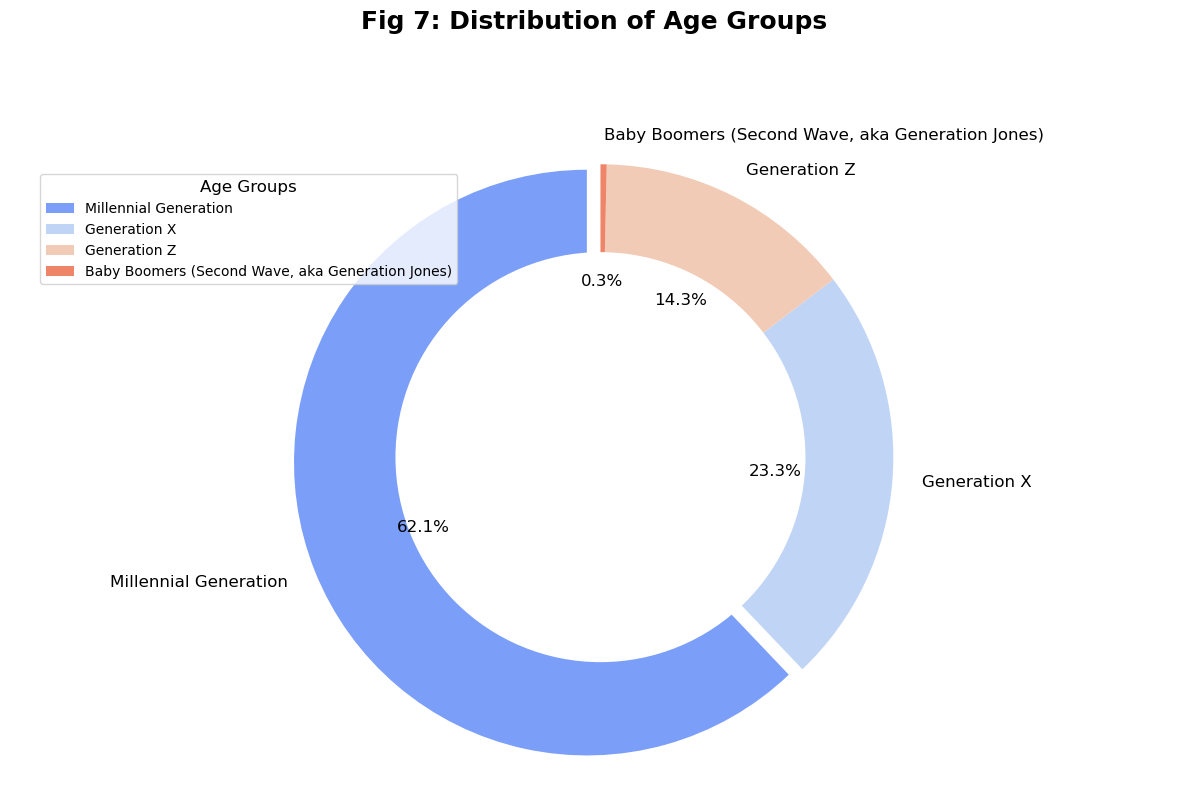

In [404]:
plt.figure(figsize=(12, 8))
age_counts = new['AgeGeneration'].value_counts()
colors = sns.color_palette('coolwarm', len(age_counts))
explode = [0.05 if i == 0 else 0 for i in range(len(age_counts))]  

plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, textprops={'fontsize': 12})

plt.title('Fig 7: Distribution of Age Groups', fontsize=18, y=1.15,fontweight='bold')
plt.axis('equal')

plt.legend(title='Age Groups', loc='upper left', bbox_to_anchor=(0.02, 0.95), fontsize=10, title_fontsize=12)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.tight_layout()
plt.show()

From the above Fig. 7, The pie chart illustrates the distribution of different age groups in a population. The largest slice, taking up 62.1% of the pie, represents the Millennial Generation. The second largest group at 23.3% is Generation X. Generation Z, also known as Baby Boomers or the Second Wave, occupies 14.3% of the chart. Finally, the smallest sliver at 0.3% represents the Baby Boomers, which is the same generation as Generation Jones. The chart clearly shows that Millennials make up the majority of this population, followed by Gen X, while the older generations, particularly Baby Boomers, constitute a much smaller proportion.

#### Fig 8 Distribution of Education Fields Analysis

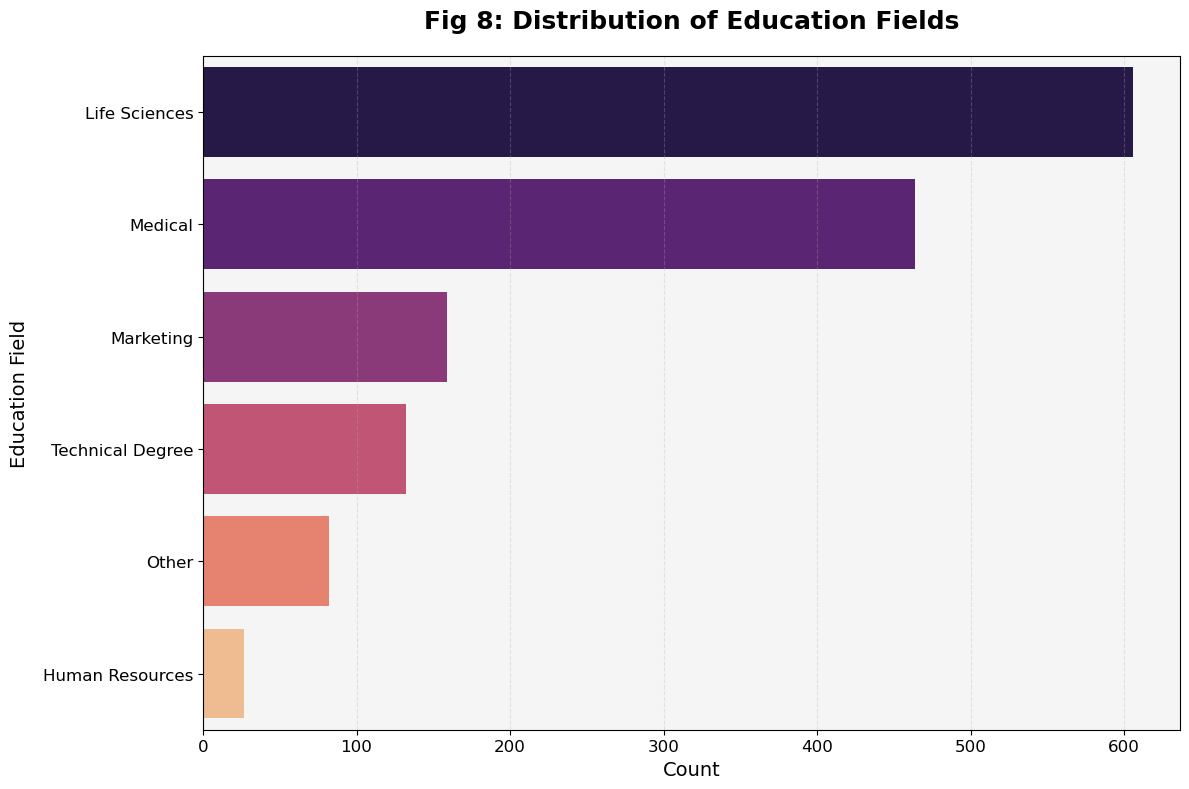

In [405]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=new, y='EducationField', order=new['EducationField'].value_counts().index, palette='magma')
plt.title('Fig 8: Distribution of Education Fields', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Education Field', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.3)

ax.set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()

From the above fig.8, The bar chart shows the distribution of employees across different education fields within a company. The field with the highest number of employees is Life Sciences, followed closely by Medical. Marketing and Technical Degree have a considerably lower number of employees compared to the top two fields. The "Other" category, which likely includes various smaller fields or unspecified education backgrounds, has an even smaller number of employees. Finally, Human Resources has the lowest count, indicating that it is the least represented education field in this company. Overall, the chart suggests that the company heavily emphasizes or requires education in Life Sciences and Medical fields for its workforce.

#### Fig 9: Relationship between Monthly Income and Total Working Years of Employees

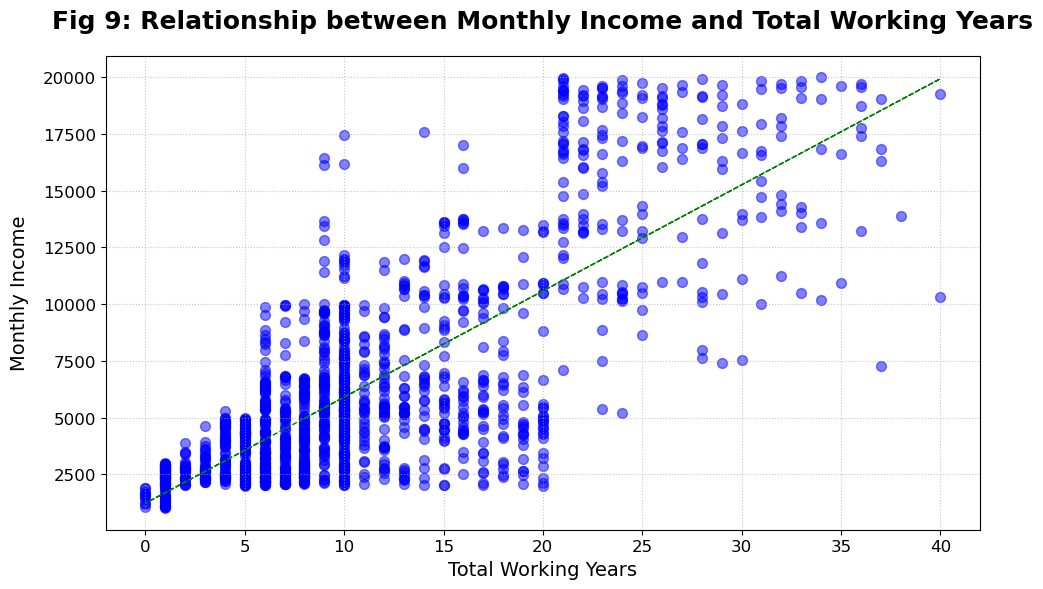

In [406]:
plt.figure(figsize=(10, 6))
plt.scatter(new['TotalWorkingYears'], new['MonthlyIncome'], color='blue', alpha=0.5, s=50)
plt.title('Fig 9: Relationship between Monthly Income and Total Working Years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Working Years', fontsize=14)
plt.ylabel('Monthly Income', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle=':', alpha=0.7)

# Adding regression line
x = new['TotalWorkingYears']
y = new['MonthlyIncome']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='green', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

From the above Fig. 9, the scatter plot shows the relationship between an employee's total working years (experience) and their monthly income. Each dot represents an individual employee. The general trend suggests that as total working years increase, monthly income also tends to rise, which is an expected positive correlation. However, there is significant variation, with some employees earning higher or lower incomes than others with similar experience levels. The income range seems to widen as years of experience increase, indicating potential career path or pay scale differences. Overall, while experience appears to be a factor in determining income, the scatter plot demonstrates that it is not the sole determinant, and individual circumstances likely play a role in income variation among employees with comparable years of experience.

#### Fig 10: Distribution of Job roles of Employees in the Company

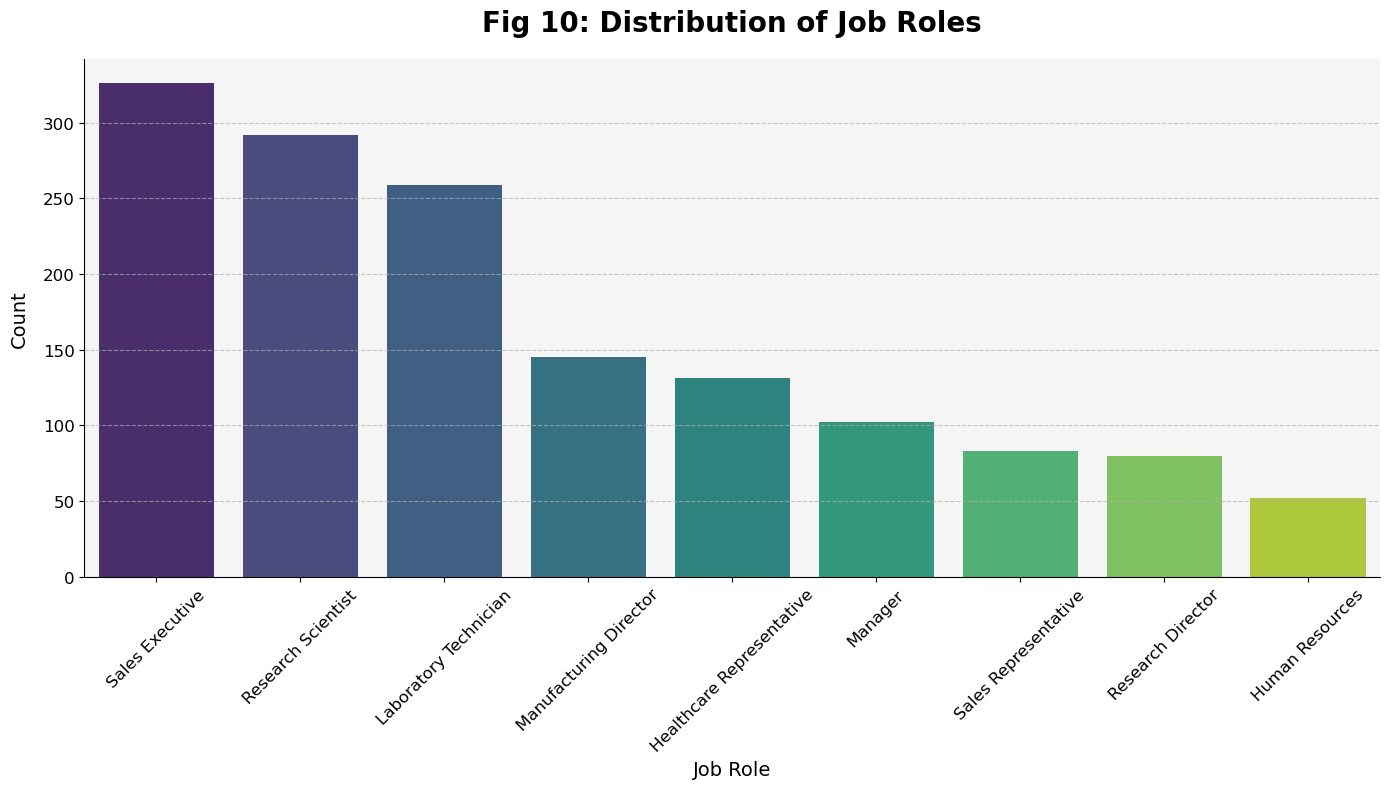

In [407]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=new, x='JobRole', order=new['JobRole'].value_counts().index, palette='viridis')
plt.title('Fig 10: Distribution of Job Roles', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()

From the above Fig. 10, the bar chart presents the distribution of employees across various job roles within a company. Sales Executive has the highest number of employees, followed by Research Scientist and Laboratory Technician. These three roles together account for a significant portion of the company's workforce. Manufacturing Director, Healthcare Representative, and Manager have a relatively lower but still substantial number of employees. The remaining job roles, including Sales Representative, Research Director, and Human Resources, have the least number of employees. This distribution suggests that the company likely focuses on sales, research, and laboratory work, with fewer employees in managerial, representative, and support roles.

#### Fig 11: Attrition of Employees wrt. Job Satisfaction

Text(0.5, 0, 'Job Satisfaction Level')

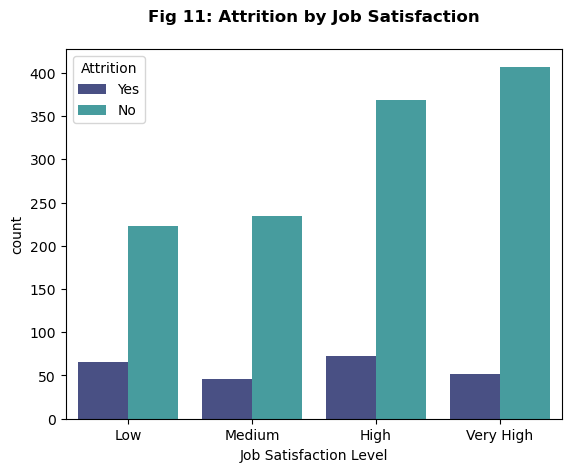

In [408]:
new['Attrition'] = new['Attrition'].astype(str)

# Plotting attrition by job satisfaction
sns.countplot(x='JobSatisfaction', hue='Attrition', data=new,  palette="mako")
plt.title('Fig 11: Attrition by Job Satisfaction', fontsize=12, fontweight='bold', pad=20)
plt.xlabel('Job Satisfaction Level')

From the above Fig 11, the bar chart displays employee attrition rates across different levels of job satisfaction. Employees with low job satisfaction have a higher rate of attrition (leaving the company) compared to those with medium, high, or very high job satisfaction levels. As job satisfaction increases from low to very high, the number of employees staying in the company (green bars) grows larger, indicating that higher job satisfaction is associated with lower employee turnover or attrition.

#### Fig 12: Heatmap of Attrition with other independent Variables

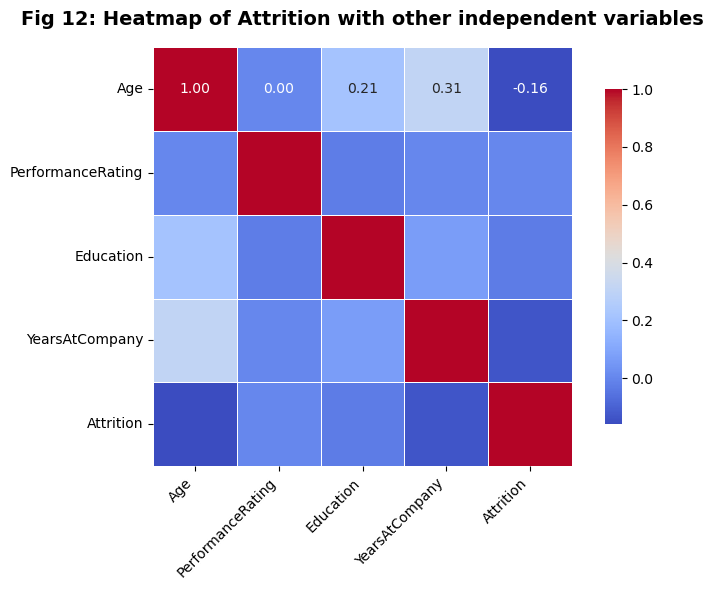

In [409]:
# Specific variables for the heatmap
heatmap_vars = ["Age", "PerformanceRating", "Education", "YearsAtCompany", "Attrition"]

# Creating a new DataFrame with the selected variables
heatmap_df = new[heatmap_vars]

# Converting categorical variables to numerical values
heatmap_df['Attrition'] = heatmap_df['Attrition'].map({'Yes': 1, 'No': 0})

# Convert 'PerformanceRating' & 'Education' to numerical values
performance_mapping = {
    'Excellent': 4,
    'Outstanding': 5,
    'Good': 3,
    'Satisfactory': 2,
    'Poor': 1
}
heatmap_df['PerformanceRating'] = heatmap_df['PerformanceRating'].map(performance_mapping)

education_mapping = {
    'Below College': 1,
    'College': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctor': 5
}
heatmap_df['Education'] = heatmap_df['Education'].map(education_mapping)

corr_matrix = heatmap_df.corr()


# Plotting the heatmap with correlation values
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': 0.8}, mask=mask)
plt.title('Fig 12: Heatmap of Attrition with other independent variables', fontsize=14, fontweight='bold', pad=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

From the above fig 12, The heatmap illustrates the correlations between variables and employee attrition. Age has the strongest positive correlation with attrition, indicating that older employees are more likely to leave. Performance rating and education have no significant correlation with attrition. Years at the company shows a weak positive correlation, suggesting that employees with longer tenures may be slightly more prone to attrition. Overall, the heatmap reveals that age is the most influential factor among the selected variables in predicting employee attrition, while the other variables have minimal impact.

## Literature Review

In organisational studies one of the main components is that of employee attribution, which is employee leaving an organisation. This review consolidates a wide spectrum of studies the review the various causes of attribution, and outline strategies that mitigates its adverse impacts, thereby helping businesses to retain employees and minimize related costs. 
 
One of the most important variables in organisational research is employee attrition, which is the act of an employee departing from an organisation. In order to illustrate the complex factors that contribute to employee attrition and outline countermeasures, this review compiles a variety of empirical research. This helps businesses keep important staff members and cut down on related expenses.
Examining job happiness and organisational commitment is the first step towards understanding the causes of employee turnover. Job discontent is the main reason why employees leave, according to Hom and Kinicki (2001), who also highlight the psychological processes that contribute to this outcome. In their investigation of the relationship between job satisfaction, organisational commitment, and turnover, Shore and Martin (2020) contend that reducing employee turnover requires both organisational tactics and individual contentment.
 
Additionally crucial are the roles played by corporate culture and civic practices. The notion of Organisational Citizenship Behaviour (OCB) is presented by Smith, Organ, and Near (1983) along with a discussion of its noteworthy negative correlation with attrition rates. Reductions in turnover intentions can be significant when OCBs are strengthened by encouraging corporate cultures. The usefulness of Strategic Human Resource Management (SHRM) in service contexts—where good personnel management raises satisfaction and lowers turnover—is covered by Chuang and Liao (2010).
Additionally important are career development and employee commitment; Allen, Bryant, and Vardaman (2010) refute popular beliefs regarding employee attrition and make the case for a planned career development pathway to improve retention. According to Blau (1985), who looks at the relationship between career commitment and turnover intentions, a higher level of professional commitment might greatly lower the chance of quitting the company.
 
Emotions also have a significant impact; Liu and Perrewé (2005) offer insights into how negative emotions like remorse and rage can directly affect turnover intentions, leading to a more complex view of the leaving process. In his discussion of organisational methods during restructuring and downsizing, Cascio (2003) highlights the importance of strategic planning and compassionate management in order to preserve morale and reduce turnover. These actions frequently result in higher turnover.
Griffeth, Hom, and Gaertner's (2000) meta-analysis provides a cornerstone on the empirical front by synthesising different employee turnover antecedents and providing evidence-based solutions. By putting forth a three-component model of organisational commitment (affective, continuation, and normative), Meyer and Allen (1991) improve upon this understanding and make it easier to create sophisticated retention techniques that take into account various aspects of employee commitment.
Employee retention is also significantly impacted by leadership. Effective leadership development is essential for retention tactics, according to research on leadership styles and their implications on employee turnover. Technology also has an impact; recent research shows how artificial intelligence can be used to anticipate attrition and take preventative measures to keep high-risk workers on board.
Workplace rules that address work-life balance are also becoming more and more relevant. The usefulness of these policies in lowering turnover has been demonstrated by recent research using longitudinal data, showing that carefully thought-out work-life balance efforts can result in higher retention rates.
Finally, there are new opportunities and problems for attrition management in the gig economy. Innovative methods of staff engagement and retention are required due to the temporary nature of gig work
 
This review concludes by showing how a variety of intricate interactions between environmental, organisational, and individual factors affect employee attrition. A comprehensive strategy that includes supportive leadership, emotionally intelligent policies, strategic human resource management, and an expanding number of technical tools is needed for the effective control of these variables. Proactively addressing these issues would help organisations save expenses associated with turnover while improving overall organisational efficacy and retaining talent.

## Summary & Conclusions <a id="nine"></a>

In Phase 1 of this project, we performed data cleaning, preprocessing, and visualisation tasks. Initially, we examined the unique values in categorical variables and dropped features with only a single unique count, such as "Over18". Subsequently, we visualised histograms for all features to identify columns that were not relevant for predicting our target feature, such as "EmployeeCount" and "EmployeeNumber". Additionally, we checked for missing values and outliers in the data, opting to remove any rows containing such data quality issues. Fortunately, there was minimal cleaning required, as the data appeared to be relatively clean. Due to the sufficient size of observations, data sampling was not performed.

We generated several visualisations to explore the data. Utilising the explanatory variables, it's evident that males have a higher tendency to leave the company compared to females. Furthermore, employees who either travel frequently or belong to the "Research and Development" department are more likely to stay in the company.

Based on the figures, the company has a relatively young workforce, with most employees aged between 30-40 years old. Employees in the research and development department, along with those in the life sciences and medical fields, exhibit higher rates of attrition. Older employees, particularly females over 50, are more likely to leave the company compared to their younger counterparts. Income level also plays a role, with lower-income employees earning between 0 and $5,000 demonstrating a greater tendency to leave. Furthermore, employees with more years of experience tend to have higher attrition rates. These insights suggest that the company faces challenges in retaining experienced personnel, as well as employees in specific departments and age groups, which could impact its long-term workforce stability and performance.
 
Lastly, from the histogram, we also observed that some of the numerical data are skewed. Scaling or transformation of the data will be needed to address this issue. We have identified **Age** and **YearsAtCompany** are the most significant features in determining employee attrition. However, further analysis needs to be done to identify any additional relationships.

## References <a id="ten"></a>

1.GeeksforGeeks. (2022). Plot a Pie Chart in Python using Matplotlib.

2.Allen, D. G., Bryant, P. C., & Vardaman, J. M. (2010). Retaining talent: Replacing misconceptions with evidence-based strategies. Academy of Management Perspectives, 24(2), 48-64.
 
3.Blau, G. J. (1985). The measurement and prediction of career commitment. Journal of Occupational Psychology, 58(4), 277-288.
 
4.Cascio, W. F. (2003). Downsizing: What do we know? What have we learned? Academy of Management Perspectives, 17(1), 95-104.
 
5.Chuang, C. H., & Liao, H. (2010). Strategic human resource management in service context: Taking care of business by taking care of employees and customers. Personnel Psychology, 63(1), 153-196.
 
6.Griffeth, R. W., Hom, P. W., & Gaertner, S. (2000). A meta-analysis of antecedents and correlates of employee turnover: Update, moderator tests, and research implications for the next millennium. Journal of Management, 26(3), 463-488.
 
7.Hom, P. W., & Kinicki, A. J. (2001). Toward a greater understanding of how dissatisfaction drives employee turnover. Academy of Management Journal, 44(5), 975-987.
 
8.Liu, Y., & Perrewé, P. L. (2005). Another look at the role of emotion in turnover intentions: The effects of anger and regret. Journal of Managerial Psychology, 20(1), 13-24.
Meyer, J. P., & Allen, N. J. (1991). A three-component conceptualization of organizational commitment. Human Resource Management Review, 1(1), 61-89.
 
9.Shore, L. M., & Martin, H. J. (2020). Job satisfaction and organizational commitment: Individual- and organizational-level perspectives. In Oxford Research Encyclopedia of Business and Management. Oxford University Press.
 
10.Smith, C. A., Organ, D. W., & Near, J. P. (1983). Organizational citizenship behavior: Its nature and antecedents. Journal of Applied Psychology, 68(4), 653-663.